In [29]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST-dataset/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-dataset/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-dataset/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-dataset/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-dataset/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/d

In [30]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [31]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
single_image = mnist.train.images[1].reshape(28,28)

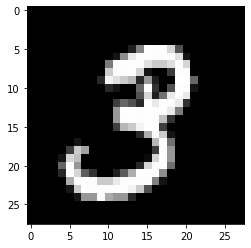

In [34]:
plt.imshow(single_image, cmap='gist_gray')

In [35]:
single_image.max()

1.0

In [36]:
#Criando o modelo

In [37]:
# PLACEHOLDERS
x = tf.placeholder(tf.float32, shape=[None,784])

In [38]:
# VARIABLES
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [39]:
# CREATE GRAPH OPERATIONS
y = tf.matmul(x,w) + b

In [40]:
# LOSS FUNCTION
#placeholder
y_true = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [41]:
# OPTMIZER
optmizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optmizer.minimize(cross_entropy)

In [43]:
# CREATE SESSION
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x,y_true:batch_y})
        
    # EVALUATE THE MODEL
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    # [true,false,true...] -> [1,0,1...]
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # PREDICTED [3,4] TRUE [3,9]
    #[true, false]
    #[1.0, 0.0]
    #0.5
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9232
